Importing the required libraries.

In [13]:
#import the openCV
import cv2
import cv2 as cv

#importing numpy for working with arrays
import numpy as np

#importing pyplot as pit from matplotlib for image visualization
from matplotlib import pyplot as plt

#import cv2.inshow for image visualization
from google.colab.patches import cv2_imshow

#importing asarray method for working with pixels
from numpy import asarray
import matplotlib.image as mpimg

#importing ndimage for multidimensional images
from scipy import ndimage

# importing PIL library
from PIL import Image

# impporting filters,features,measures,and color from skimage
from skimage import filters, feature, measure, color

#importing watershed algorithm for touching problem
from skimage.segmentation import watershed

Defining the show Function

In [14]:
# define the show function for x and y coordinates for images
def show(image,x=30,y=7):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)


image Pre-processing

1. Reading the image from the diretory

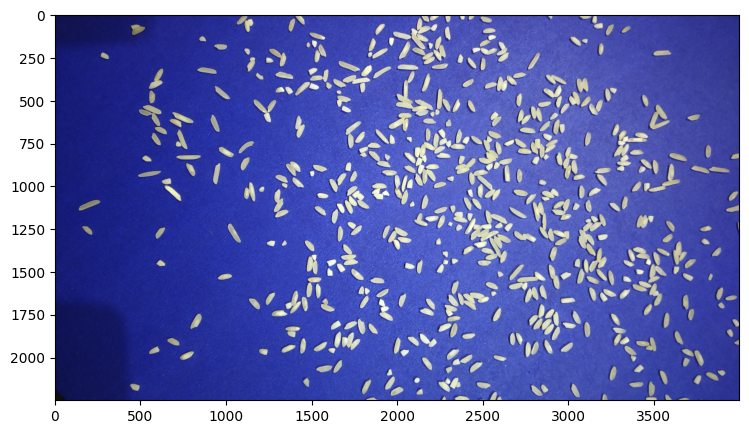

In [15]:
#Reading image
img= cv2.imread("/content/drive/MyDrive/data/data/test/image_1.jpg")
show(img, 25, 5)

converting image into grayscale and image thresholding

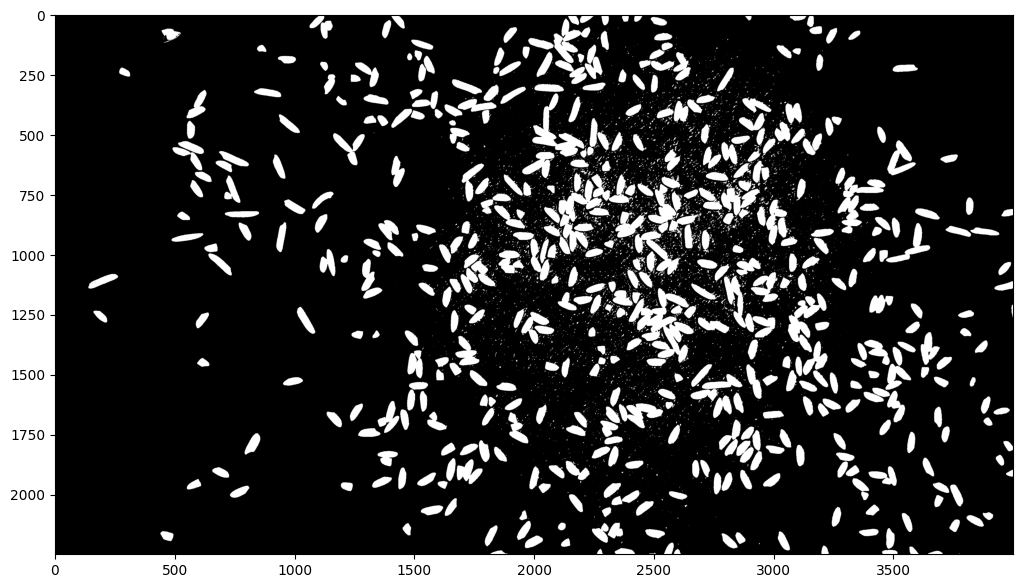

In [16]:
#converting image to gray for image thresholding
grayscale_image=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh_img=cv2.threshold(grayscale_image, 120, 255, cv2.THRESH_BINARY)

show(thresh_img)

Noise removal

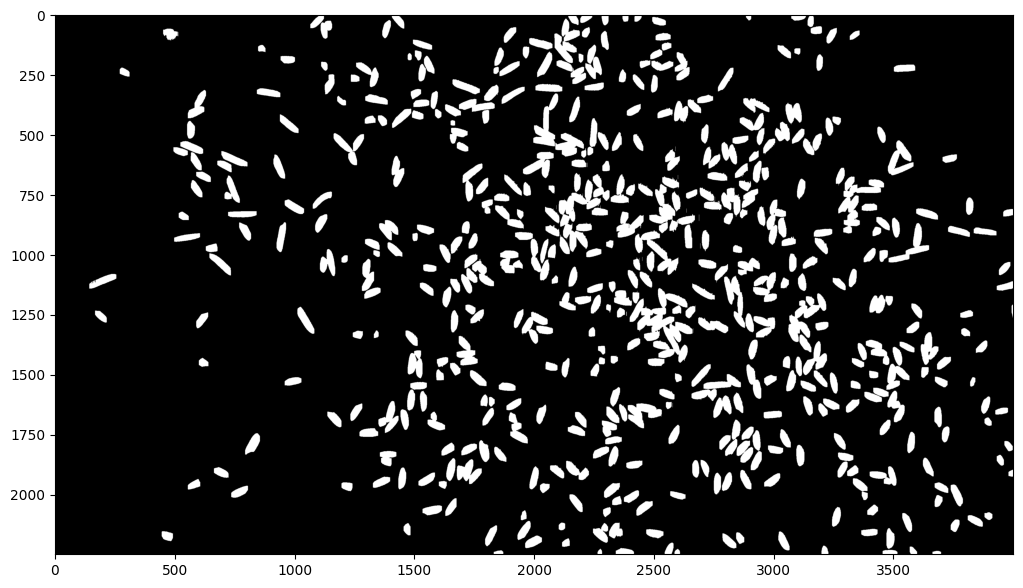

In [ ]:
# Noise removal
kernel = np.ones((3), np.uint8)
clear_image=cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations=8)

show(clear_image)

In [11]:
label_image=clear_image.copy()
label_count=0
rows, cols=label_image.shape
for j in range(rows):
  for i in range(cols):
    pixel=label_image[j, i]
    if 255==pixel:
      label_count +=i
      cv.floodFill(label_image, None, (i, j), label_count)

Number of foreground objects 2147760189


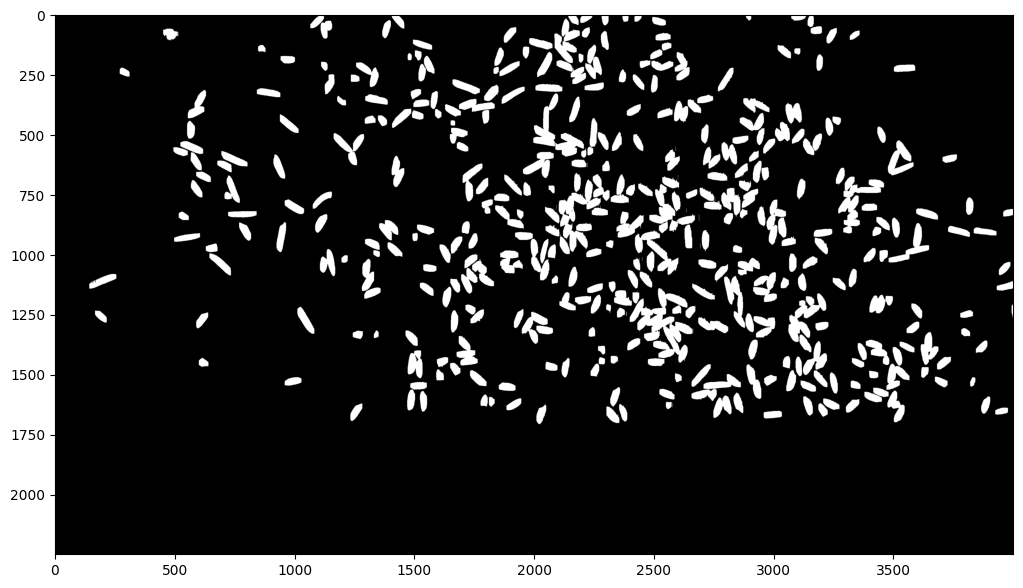

In [17]:
print("Number of foreground objects",label_count)
show(label_image)

Counting rice grains using countours method

In [18]:
# countour method to count rice grains
contours, hierarchy = cv.findContours(clear_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1,(0, 0, 255), 2)
print("Number of detected contours ", len(contours))

Number of detected contours  513


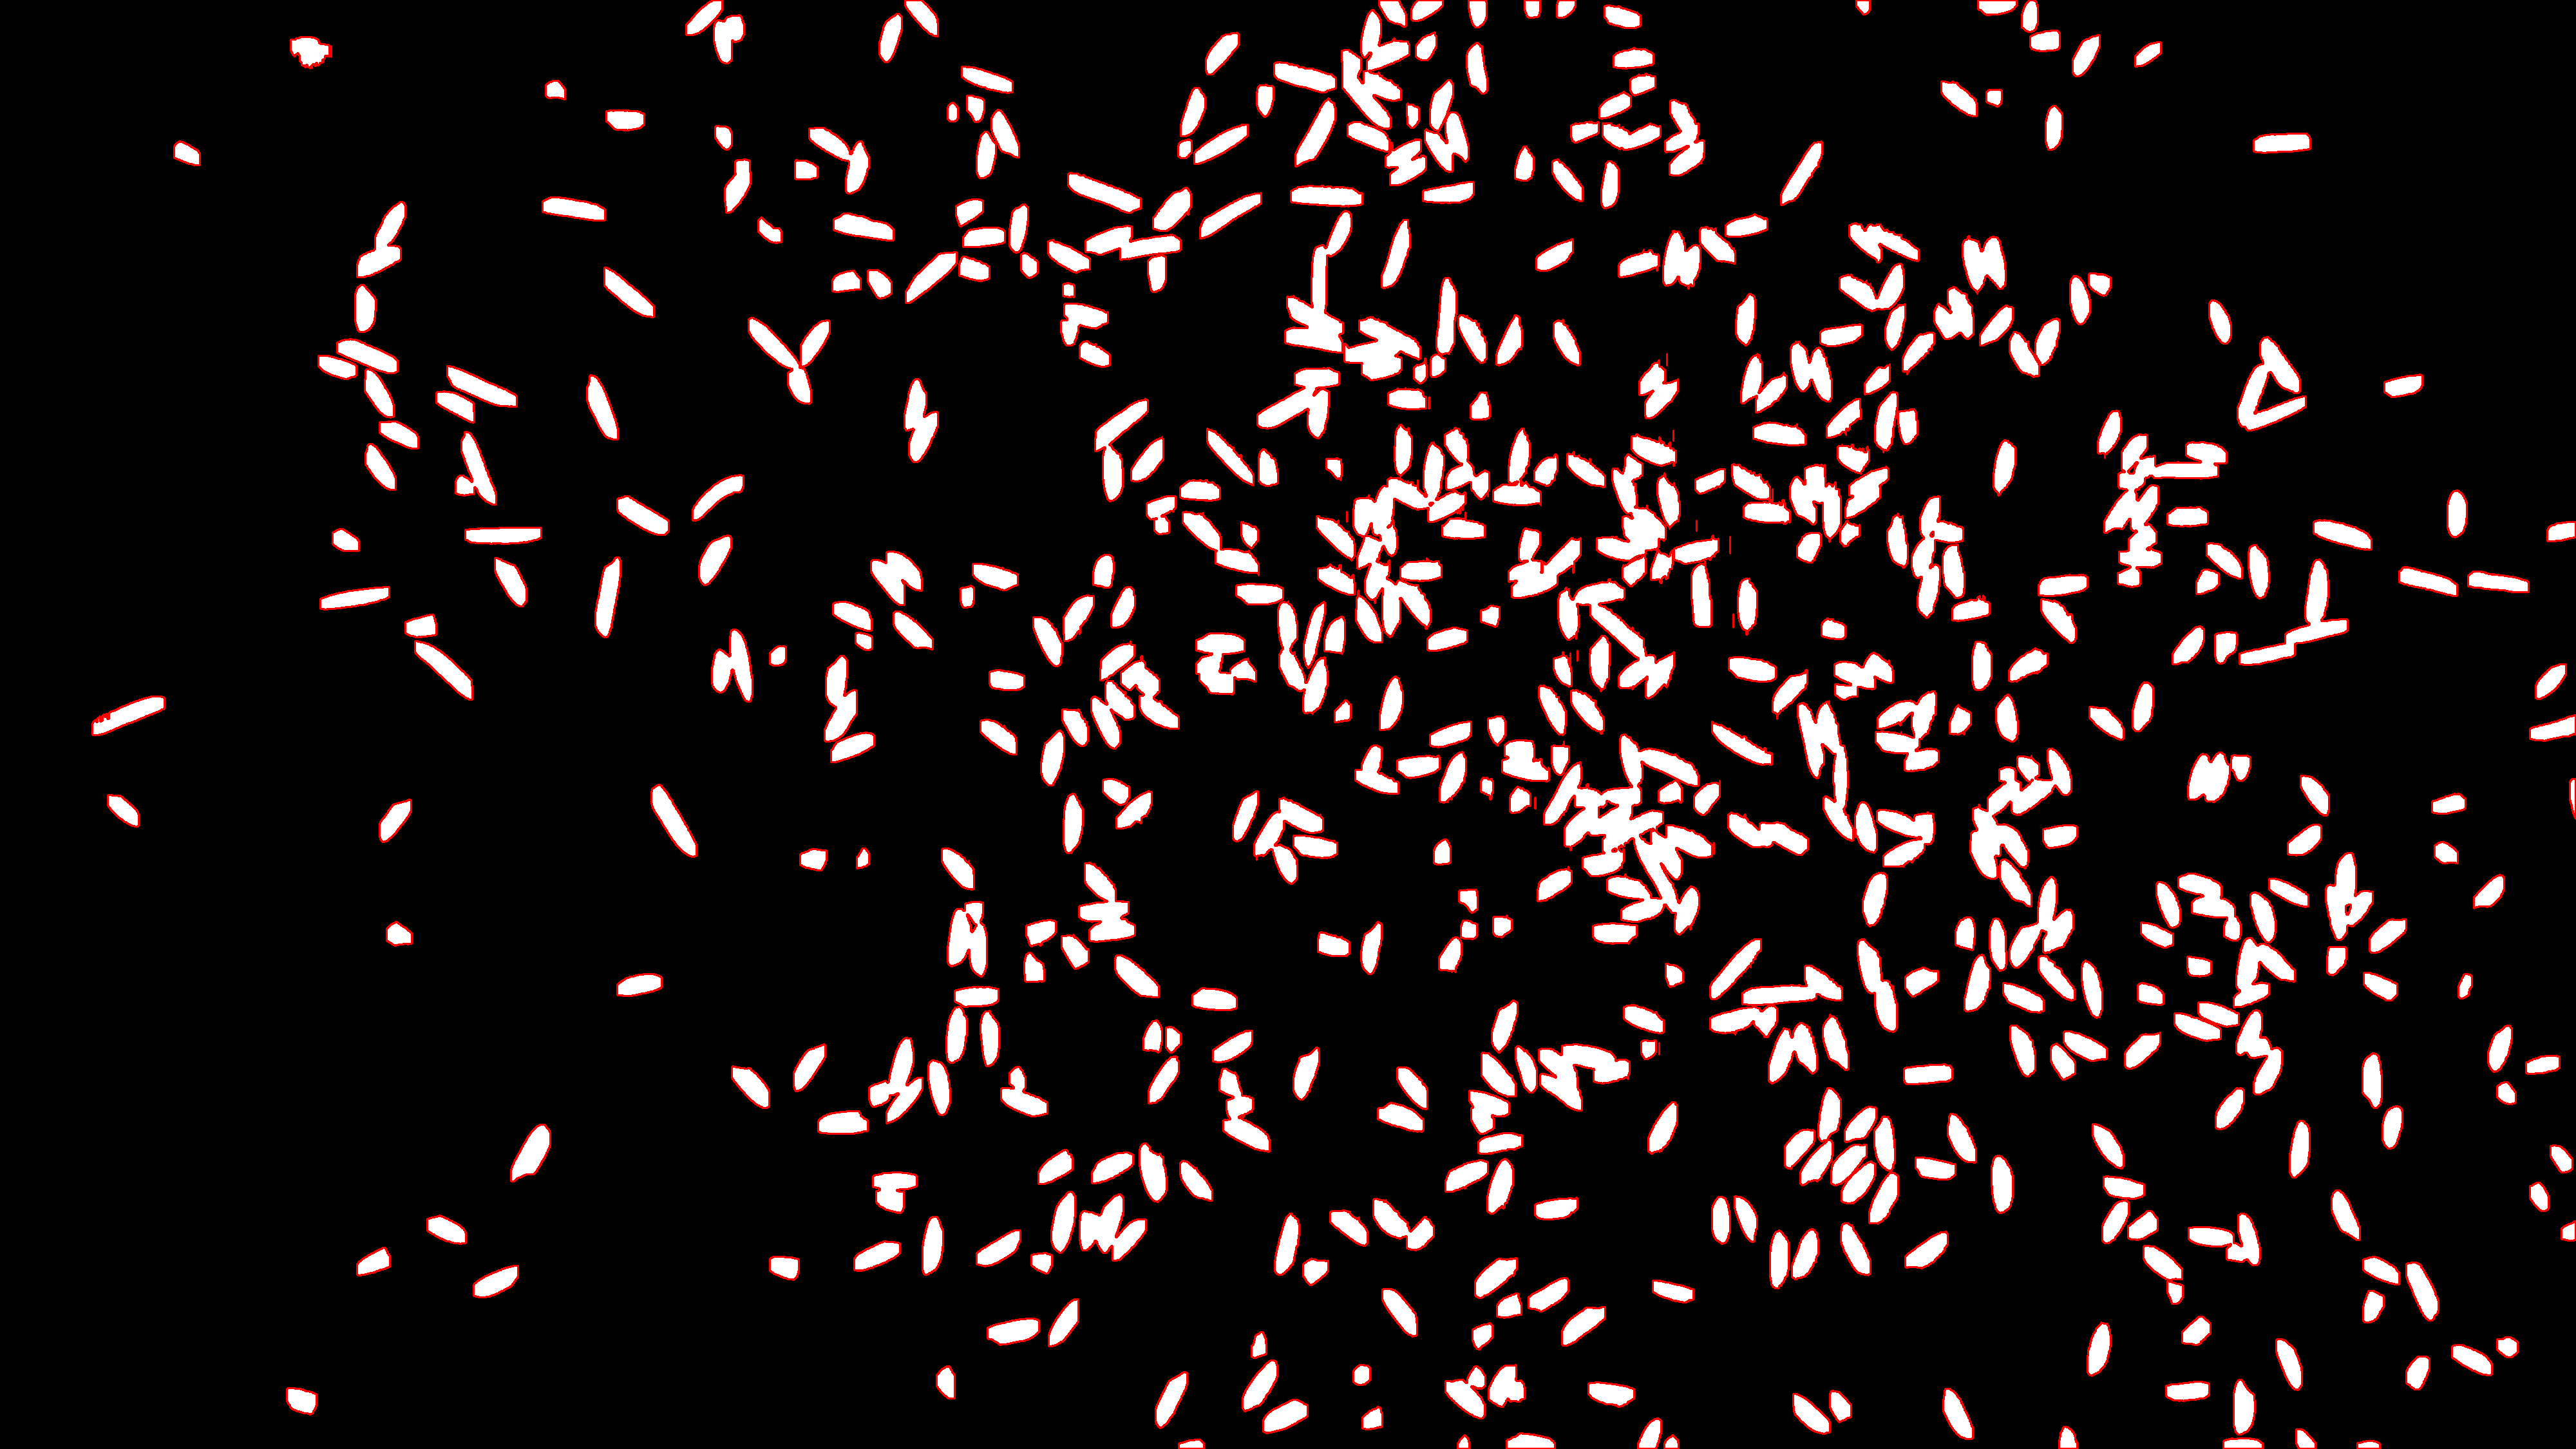


 Number of detecte contours 513


In [19]:
cv2_imshow(output_contour)
print("\n Number of detecte contours", len(contours))

applying watershed algorithm

for solving the touch grain problem

In [21]:
# applying distance _transform to computes the distance from non-zero to the nearest zero
dist_trans = ndimage.distance_transform_edt(clear_image)
local_max=feature.peak_local_max(dist_trans,min_distance=23)
local_max_mask=np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)]=True
#applying watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image)


Counting total grians and Broken grains using grains area


Number of Rice Grains are =586


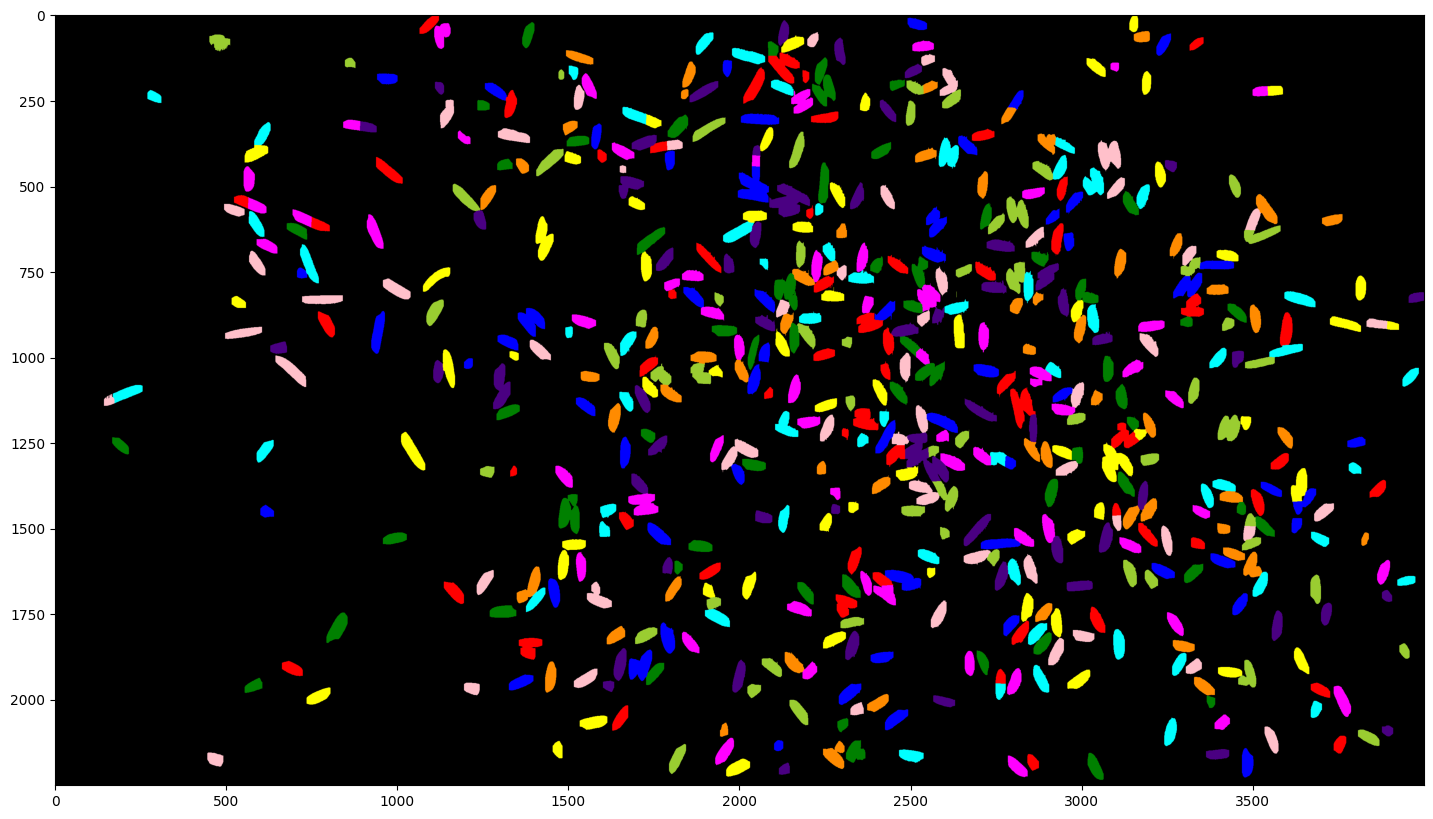

In [22]:
plt.figure(figsize=(30, 10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice Grains are =%d" % labels.max())

Counting broken rice

In [24]:
count = []
for x in contours:
  area = cv.contourArea(x)
  if area <800:
    count.append(x)
print("Total number of broken rice present int the image is:",len(count))


Total number of broken rice present int the image is: 87


End note

In this project, firstly i am importing the packages required for project and in the second step i will read the images through the imread function after importing performs image preprocessing. After that convert the image rgb to gray and removes the noise using morphologyEx method and after applying the labels and apply the contour method for counting the grains and finally watershed algorithm for sloving the touch grain problem.